## Support Vector Machines Classifier

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [37]:
from sklearn.datasets import make_classification

In [38]:
x,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)

In [39]:
x,y

(array([[-1.25057055, -1.67119191],
        [-0.22541879, -1.65270811],
        [-0.92487265, -1.4412589 ],
        ...,
        [-0.23668319, -1.43582822],
        [-0.68767665, -0.87693853],
        [-2.05426122,  0.69668402]]),
 array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
        1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
        1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
        1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
        0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
        0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
        0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
        0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 

In [40]:
X=pd.DataFrame(x,columns=["f1","f2"])
y=pd.DataFrame(y,columns=["Output"])
df=pd.concat([X,y],axis=1)
df.head()

,f1,f2,Output
0,-1.250571,-1.671192,0
1,-0.225419,-1.652708,0
2,-0.924873,-1.441259,0
3,-0.840081,-1.346313,0
4,0.199412,1.628449,1


In [41]:
df.shape

(1000, 3)

<Axes: xlabel='f1', ylabel='f2'>

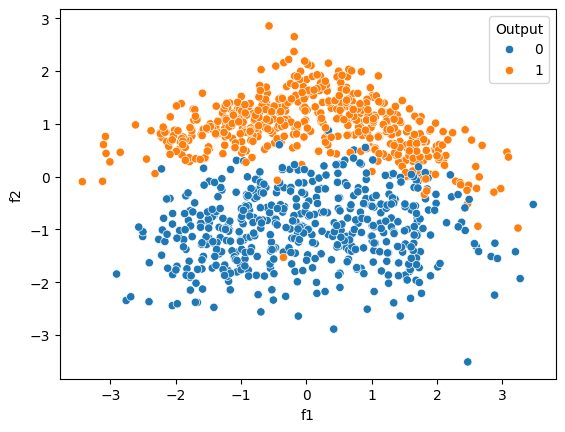

In [42]:
sns.scatterplot(x=df["f1"],y=df["f2"],hue=df["Output"])

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [48]:
x_test.shape,y_test.shape

((200, 2), (200, 1))

In [50]:
from sklearn.svm import SVC

In [51]:
model=SVC(kernel="linear")

In [53]:
model.fit(x_train,y_train)

e:\DATA SCIENCE 101 DAYS CHALENGE\abhi\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [54]:
model.coef_

array([[0.21882232, 2.8524148 ]])

In [55]:
y_pred=model.predict(x_test)

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
accuracy_score(y_test,y_pred)

0.92

In [58]:
from sklearn.model_selection import GridSearchCV
parameters={
    "C":[0.1,1,10,100,1000],
    "gamma":[1,0.1,0.01,0.001,0.0001]
}

In [59]:
cv=GridSearchCV(model,cv=5,param_grid=parameters,verbose=3)

In [60]:
cv.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.956 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.900 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.963 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.963 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.938 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.956 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.900 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.963 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.963 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.938 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.956 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

e:\DATA SCIENCE 101 DAYS CHALENGE\abhi\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\DATA SCIENCE 101 DAYS CHALENGE\abhi\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\DATA SCIENCE 101 DAYS CHALENGE\abhi\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\DATA SCIENCE 101 DAYS CHALENGE\abhi\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array w

[CV 3/5] END .................C=0.1, gamma=0.01;, score=0.963 total time=   0.0s
[CV 4/5] END .................C=0.1, gamma=0.01;, score=0.963 total time=   0.0s
[CV 5/5] END .................C=0.1, gamma=0.01;, score=0.938 total time=   0.0s
[CV 1/5] END ................C=0.1, gamma=0.001;, score=0.956 total time=   0.0s
[CV 2/5] END ................C=0.1, gamma=0.001;, score=0.900 total time=   0.0s
[CV 3/5] END ................C=0.1, gamma=0.001;, score=0.963 total time=   0.0s
[CV 4/5] END ................C=0.1, gamma=0.001;, score=0.963 total time=   0.0s
[CV 5/5] END ................C=0.1, gamma=0.001;, score=0.938 total time=   0.0s
[CV 1/5] END ...............C=0.1, gamma=0.0001;, score=0.956 total time=   0.0s
[CV 2/5] END ...............C=0.1, gamma=0.0001;, score=0.900 total time=   0.0s
[CV 3/5] END ...............C=0.1, gamma=0.0001;, score=0.963 total time=   0.0s
[CV 4/5] END ...............C=0.1, gamma=0.0001;, score=0.963 total time=   0.0s
[CV 5/5] END ...............

e:\DATA SCIENCE 101 DAYS CHALENGE\abhi\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\DATA SCIENCE 101 DAYS CHALENGE\abhi\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\DATA SCIENCE 101 DAYS CHALENGE\abhi\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\DATA SCIENCE 101 DAYS CHALENGE\abhi\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array w

[CV 1/5] END ....................C=1, gamma=0.1;, score=0.963 total time=   0.0s
[CV 2/5] END ....................C=1, gamma=0.1;, score=0.906 total time=   0.0s
[CV 3/5] END ....................C=1, gamma=0.1;, score=0.969 total time=   0.0s
[CV 4/5] END ....................C=1, gamma=0.1;, score=0.963 total time=   0.0s
[CV 5/5] END ....................C=1, gamma=0.1;, score=0.938 total time=   0.0s
[CV 1/5] END ...................C=1, gamma=0.01;, score=0.963 total time=   0.0s
[CV 2/5] END ...................C=1, gamma=0.01;, score=0.906 total time=   0.0s
[CV 3/5] END ...................C=1, gamma=0.01;, score=0.969 total time=   0.0s
[CV 4/5] END ...................C=1, gamma=0.01;, score=0.963 total time=   0.0s
[CV 5/5] END ...................C=1, gamma=0.01;, score=0.938 total time=   0.0s
[CV 1/5] END ..................C=1, gamma=0.001;, score=0.963 total time=   0.0s
[CV 2/5] END ..................C=1, gamma=0.001;, score=0.906 total time=   0.0s
[CV 3/5] END ...............

e:\DATA SCIENCE 101 DAYS CHALENGE\abhi\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\DATA SCIENCE 101 DAYS CHALENGE\abhi\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\DATA SCIENCE 101 DAYS CHALENGE\abhi\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\DATA SCIENCE 101 DAYS CHALENGE\abhi\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array w

[CV 5/5] END ..................C=1, gamma=0.001;, score=0.938 total time=   0.0s
[CV 1/5] END .................C=1, gamma=0.0001;, score=0.963 total time=   0.0s
[CV 2/5] END .................C=1, gamma=0.0001;, score=0.906 total time=   0.0s
[CV 3/5] END .................C=1, gamma=0.0001;, score=0.969 total time=   0.0s
[CV 4/5] END .................C=1, gamma=0.0001;, score=0.963 total time=   0.0s
[CV 5/5] END .................C=1, gamma=0.0001;, score=0.938 total time=   0.0s
[CV 1/5] END .....................C=10, gamma=1;, score=0.969 total time=   0.0s
[CV 2/5] END .....................C=10, gamma=1;, score=0.900 total time=   0.0s
[CV 3/5] END .....................C=10, gamma=1;, score=0.969 total time=   0.0s
[CV 4/5] END .....................C=10, gamma=1;, score=0.963 total time=   0.0s
[CV 5/5] END .....................C=10, gamma=1;, score=0.938 total time=   0.0s


e:\DATA SCIENCE 101 DAYS CHALENGE\abhi\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\DATA SCIENCE 101 DAYS CHALENGE\abhi\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\DATA SCIENCE 101 DAYS CHALENGE\abhi\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\DATA SCIENCE 101 DAYS CHALENGE\abhi\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array w

[CV 1/5] END ...................C=10, gamma=0.1;, score=0.969 total time=   0.0s
[CV 2/5] END ...................C=10, gamma=0.1;, score=0.900 total time=   0.0s
[CV 3/5] END ...................C=10, gamma=0.1;, score=0.969 total time=   0.0s
[CV 4/5] END ...................C=10, gamma=0.1;, score=0.963 total time=   0.0s
[CV 5/5] END ...................C=10, gamma=0.1;, score=0.938 total time=   0.0s
[CV 1/5] END ..................C=10, gamma=0.01;, score=0.969 total time=   0.0s
[CV 2/5] END ..................C=10, gamma=0.01;, score=0.900 total time=   0.0s
[CV 3/5] END ..................C=10, gamma=0.01;, score=0.969 total time=   0.0s
[CV 4/5] END ..................C=10, gamma=0.01;, score=0.963 total time=   0.0s
[CV 5/5] END ..................C=10, gamma=0.01;, score=0.938 total time=   0.0s


e:\DATA SCIENCE 101 DAYS CHALENGE\abhi\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\DATA SCIENCE 101 DAYS CHALENGE\abhi\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\DATA SCIENCE 101 DAYS CHALENGE\abhi\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\DATA SCIENCE 101 DAYS CHALENGE\abhi\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array w

[CV 1/5] END .................C=10, gamma=0.001;, score=0.969 total time=   0.0s
[CV 2/5] END .................C=10, gamma=0.001;, score=0.900 total time=   0.0s
[CV 3/5] END .................C=10, gamma=0.001;, score=0.969 total time=   0.0s
[CV 4/5] END .................C=10, gamma=0.001;, score=0.963 total time=   0.0s
[CV 5/5] END .................C=10, gamma=0.001;, score=0.938 total time=   0.0s
[CV 1/5] END ................C=10, gamma=0.0001;, score=0.969 total time=   0.0s
[CV 2/5] END ................C=10, gamma=0.0001;, score=0.900 total time=   0.0s
[CV 3/5] END ................C=10, gamma=0.0001;, score=0.969 total time=   0.0s
[CV 4/5] END ................C=10, gamma=0.0001;, score=0.963 total time=   0.0s
[CV 5/5] END ................C=10, gamma=0.0001;, score=0.938 total time=   0.0s
[CV 1/5] END ....................C=100, gamma=1;, score=0.969 total time=   0.0s


e:\DATA SCIENCE 101 DAYS CHALENGE\abhi\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\DATA SCIENCE 101 DAYS CHALENGE\abhi\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\DATA SCIENCE 101 DAYS CHALENGE\abhi\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\DATA SCIENCE 101 DAYS CHALENGE\abhi\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array w

[CV 2/5] END ....................C=100, gamma=1;, score=0.900 total time=   0.0s
[CV 3/5] END ....................C=100, gamma=1;, score=0.969 total time=   0.0s
[CV 4/5] END ....................C=100, gamma=1;, score=0.963 total time=   0.0s
[CV 5/5] END ....................C=100, gamma=1;, score=0.938 total time=   0.0s
[CV 1/5] END ..................C=100, gamma=0.1;, score=0.969 total time=   0.0s
[CV 2/5] END ..................C=100, gamma=0.1;, score=0.900 total time=   0.0s
[CV 3/5] END ..................C=100, gamma=0.1;, score=0.969 total time=   0.0s
[CV 4/5] END ..................C=100, gamma=0.1;, score=0.963 total time=   0.0s


e:\DATA SCIENCE 101 DAYS CHALENGE\abhi\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\DATA SCIENCE 101 DAYS CHALENGE\abhi\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\DATA SCIENCE 101 DAYS CHALENGE\abhi\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\DATA SCIENCE 101 DAYS CHALENGE\abhi\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array w

[CV 5/5] END ..................C=100, gamma=0.1;, score=0.938 total time=   0.0s
[CV 1/5] END .................C=100, gamma=0.01;, score=0.969 total time=   0.0s
[CV 2/5] END .................C=100, gamma=0.01;, score=0.900 total time=   0.0s
[CV 3/5] END .................C=100, gamma=0.01;, score=0.969 total time=   0.0s


e:\DATA SCIENCE 101 DAYS CHALENGE\abhi\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\DATA SCIENCE 101 DAYS CHALENGE\abhi\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\DATA SCIENCE 101 DAYS CHALENGE\abhi\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\DATA SCIENCE 101 DAYS CHALENGE\abhi\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array w

[CV 4/5] END .................C=100, gamma=0.01;, score=0.963 total time=   0.0s
[CV 5/5] END .................C=100, gamma=0.01;, score=0.938 total time=   0.0s
[CV 1/5] END ................C=100, gamma=0.001;, score=0.969 total time=   0.0s
[CV 2/5] END ................C=100, gamma=0.001;, score=0.900 total time=   0.0s
[CV 3/5] END ................C=100, gamma=0.001;, score=0.969 total time=   0.0s
[CV 4/5] END ................C=100, gamma=0.001;, score=0.963 total time=   0.0s
[CV 5/5] END ................C=100, gamma=0.001;, score=0.938 total time=   0.0s
[CV 1/5] END ...............C=100, gamma=0.0001;, score=0.969 total time=   0.0s
[CV 2/5] END ...............C=100, gamma=0.0001;, score=0.900 total time=   0.0s


e:\DATA SCIENCE 101 DAYS CHALENGE\abhi\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\DATA SCIENCE 101 DAYS CHALENGE\abhi\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\DATA SCIENCE 101 DAYS CHALENGE\abhi\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\DATA SCIENCE 101 DAYS CHALENGE\abhi\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array w

[CV 3/5] END ...............C=100, gamma=0.0001;, score=0.969 total time=   0.0s
[CV 4/5] END ...............C=100, gamma=0.0001;, score=0.963 total time=   0.0s
[CV 5/5] END ...............C=100, gamma=0.0001;, score=0.938 total time=   0.0s


e:\DATA SCIENCE 101 DAYS CHALENGE\abhi\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\DATA SCIENCE 101 DAYS CHALENGE\abhi\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\DATA SCIENCE 101 DAYS CHALENGE\abhi\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...................C=1000, gamma=1;, score=0.969 total time=   0.2s


e:\DATA SCIENCE 101 DAYS CHALENGE\abhi\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...................C=1000, gamma=1;, score=0.900 total time=   0.2s


e:\DATA SCIENCE 101 DAYS CHALENGE\abhi\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...................C=1000, gamma=1;, score=0.969 total time=   0.4s
[CV 4/5] END ...................C=1000, gamma=1;, score=0.963 total time=   0.0s


e:\DATA SCIENCE 101 DAYS CHALENGE\abhi\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\DATA SCIENCE 101 DAYS CHALENGE\abhi\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...................C=1000, gamma=1;, score=0.938 total time=   0.0s
[CV 1/5] END .................C=1000, gamma=0.1;, score=0.969 total time=   0.1s


e:\DATA SCIENCE 101 DAYS CHALENGE\abhi\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\DATA SCIENCE 101 DAYS CHALENGE\abhi\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .................C=1000, gamma=0.1;, score=0.900 total time=   0.0s
[CV 3/5] END .................C=1000, gamma=0.1;, score=0.969 total time=   0.0s


e:\DATA SCIENCE 101 DAYS CHALENGE\abhi\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\DATA SCIENCE 101 DAYS CHALENGE\abhi\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .................C=1000, gamma=0.1;, score=0.963 total time=   0.0s
[CV 5/5] END .................C=1000, gamma=0.1;, score=0.938 total time=   0.0s


e:\DATA SCIENCE 101 DAYS CHALENGE\abhi\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\DATA SCIENCE 101 DAYS CHALENGE\abhi\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ................C=1000, gamma=0.01;, score=0.969 total time=   0.1s
[CV 2/5] END ................C=1000, gamma=0.01;, score=0.900 total time=   0.0s
[CV 3/5] END ................C=1000, gamma=0.01;, score=0.969 total time=   0.0s


e:\DATA SCIENCE 101 DAYS CHALENGE\abhi\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\DATA SCIENCE 101 DAYS CHALENGE\abhi\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\DATA SCIENCE 101 DAYS CHALENGE\abhi\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ................C=1000, gamma=0.01;, score=0.963 total time=   0.1s


e:\DATA SCIENCE 101 DAYS CHALENGE\abhi\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ................C=1000, gamma=0.01;, score=0.938 total time=   0.1s


e:\DATA SCIENCE 101 DAYS CHALENGE\abhi\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...............C=1000, gamma=0.001;, score=0.969 total time=   0.6s


e:\DATA SCIENCE 101 DAYS CHALENGE\abhi\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...............C=1000, gamma=0.001;, score=0.900 total time=   0.3s


e:\DATA SCIENCE 101 DAYS CHALENGE\abhi\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...............C=1000, gamma=0.001;, score=0.969 total time=   0.4s


e:\DATA SCIENCE 101 DAYS CHALENGE\abhi\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...............C=1000, gamma=0.001;, score=0.963 total time=   0.4s
[CV 5/5] END ...............C=1000, gamma=0.001;, score=0.938 total time=   0.0s


e:\DATA SCIENCE 101 DAYS CHALENGE\abhi\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\DATA SCIENCE 101 DAYS CHALENGE\abhi\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ..............C=1000, gamma=0.0001;, score=0.969 total time=   0.3s


e:\DATA SCIENCE 101 DAYS CHALENGE\abhi\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ..............C=1000, gamma=0.0001;, score=0.900 total time=   0.2s


e:\DATA SCIENCE 101 DAYS CHALENGE\abhi\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ..............C=1000, gamma=0.0001;, score=0.969 total time=   0.4s
[CV 4/5] END ..............C=1000, gamma=0.0001;, score=0.963 total time=   0.0s


e:\DATA SCIENCE 101 DAYS CHALENGE\abhi\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\DATA SCIENCE 101 DAYS CHALENGE\abhi\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ..............C=1000, gamma=0.0001;, score=0.938 total time=   0.4s


e:\DATA SCIENCE 101 DAYS CHALENGE\abhi\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [61]:
cv.best_params_

{'C': 1, 'gamma': 1}

In [62]:
model=SVC(C=1,gamma=1,kernel="linear")

In [63]:
model.fit(x_train,y_train)

e:\DATA SCIENCE 101 DAYS CHALENGE\abhi\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, gamma=1, kernel='linear')

In [65]:
y_pred=model.predict(x_test)

In [66]:
accuracy_score(y_test,y_pred)

0.92